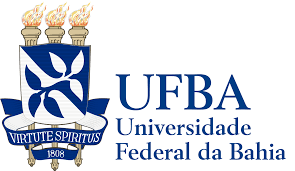

Data: 20/08/2020
Lucas Rabelo

 O pacote "COVID19" no R, contém um banco de dados unificado e que é atualizado diariamente, isso proporciona um fator muito interessante para o trabalho que é poder re-utilizar o código para acessar dados novos e acompanhar a evolução referente a situação de pandemia diariamente. Os dados presentes no banco de dados referem-se ao mundo todo, porém com a função utilizada para chamar o banco: *covid19()*, é possível extrair um subset do banco de dados por países e por data, há também a possibilidade de juntar os dados do banco unificado da Covid19 com dados do banco mundial (dados para o pib), da google (mobilidade e covid) e da apple (mobilidade e covid).


O banco unificado apresenta dados de diversas fontes, referente ao número acumulado diário de casos, mortes, recuperados e testes disponíveis, além disso existe o tipo de implementação de política de isolamento social, quando foi implementada (se mudou ou não), e quando foi relaxada ou terminou. Dentre algumas fontes de dados estão:

1.   Oxford Covid19 Government Response Tracker
2.   Johns Hopkins


Cran:https://cran.r-project.org/web/packages/COVID19/COVID19.pdf

fontes de dados disponíveis em: https://github.com/covid19datahub/COVID19

Variaveis:https://covid19datahub.io/articles/doc/data.html

In [ ]:
library(tidyverse)
install.packages("COVID19")
library(COVID19)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘wbstats’




We have invested a lot of time and effort in creating COVID-19 Data Hub, please cite the following when using it:

  Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open
  Source Software 5(51):2376, doi: 10.21105/joss.02376.

A BibTeX entry for LaTeX users is

  @Article{,
    title = {COVID-19 Data Hub},
    year = {2020},
    doi = {10.21105/joss.02376},
    author = {Emanuele Guidotti and David Ardia},
    journal = {Journal of Open Source Software},
    volume = {5},
    number = {51},
    pages = {2376},
  }

To retrieve citation and metadata of the data sources see ?covid19cite. To hide this message use 'verbose = FALSE'.


 Para iniciar a criação de mapas foi utilizado o pacote **rworldmap**, o qual é uma das maneiras mais básicas e fáceis de realizar a criação dos mapas no R.

In [ ]:
#March 2020 covid19 data
worldcovid=covid19(start = '2020-03-31',end='2020-03-31')

#plotting rworld map
install.packages("rworldmap")
#tip:https://stackoverflow.com/questions/22625119/choropleth-world-map
library(rworldmap)


É muito mais eficiente juntar os códigos de países presentes no banco da covid utilizando o pacote **rworldmap**.


In [ ]:

#another way
gtd        <- worldcovid
gtd.recent <- gtd
gtd.recent <- aggregate(deaths~id,gtd.recent,sum)

#join data to a map
gtdMap <- joinCountryData2Map( gtd.recent, 
                               nameJoinColumn="id", 
                               joinCode="NAME" )


191 codes from your data successfully matched countries in the map
5 codes from your data failed to match with a country code in the map
52 codes from the map weren't represented in your data


O mapa a seguir utiliza os dados de mortes acumuladas até o final do mês de março, quando a Itália ainda estava no epicentro da pandemia e a mesma começou a se agravar nos Estados Unidos, é interessante ressaltar que tiveram alguns países que não foi possível obter dados como o Turcomenistão por exemplo. Já territórios de outros países como a Groelândia (que teve seu número de casos contado na Dinamarca), tiveram seus casos contabilizados nos seus países.

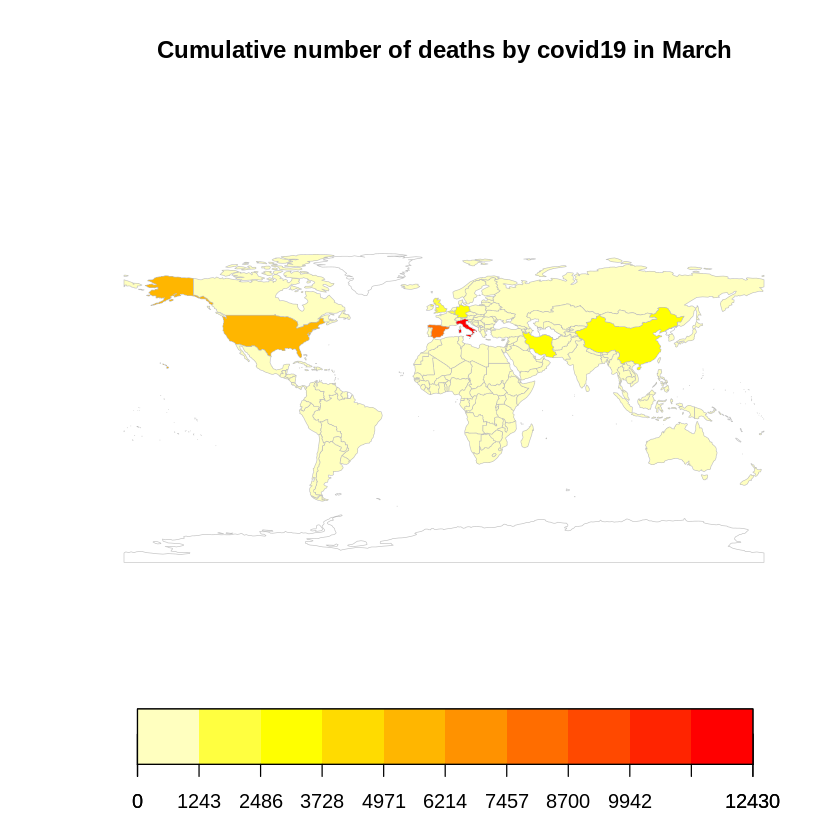

In [ ]:
#plot the map
options(scipen=999)#getting rid of scientific notation
#changing the legend

wmap <- mapCountryData( gtdMap, 
                        nameColumnToPlot='deaths', 
                        catMethod="fixedWidth", 
                        numCats=10,colourPalette = "heat",mapTitle = "Cumulative number of deaths by covid19 in March")

do.call( addMapLegend
         , c( wmap
              , legendLabels="all"
              , legendWidth=2.2
              , legendIntervals="data"
              , legendMar = 3 ) )




Outra coisa interessante do método **rworldmap** para realizar mapas, é poder categorizar os dados contínuos, e também facilmente realizar o recorte de uma das regiões do globo, como foi o caso da Eurásia no segundo mapa abaixo.


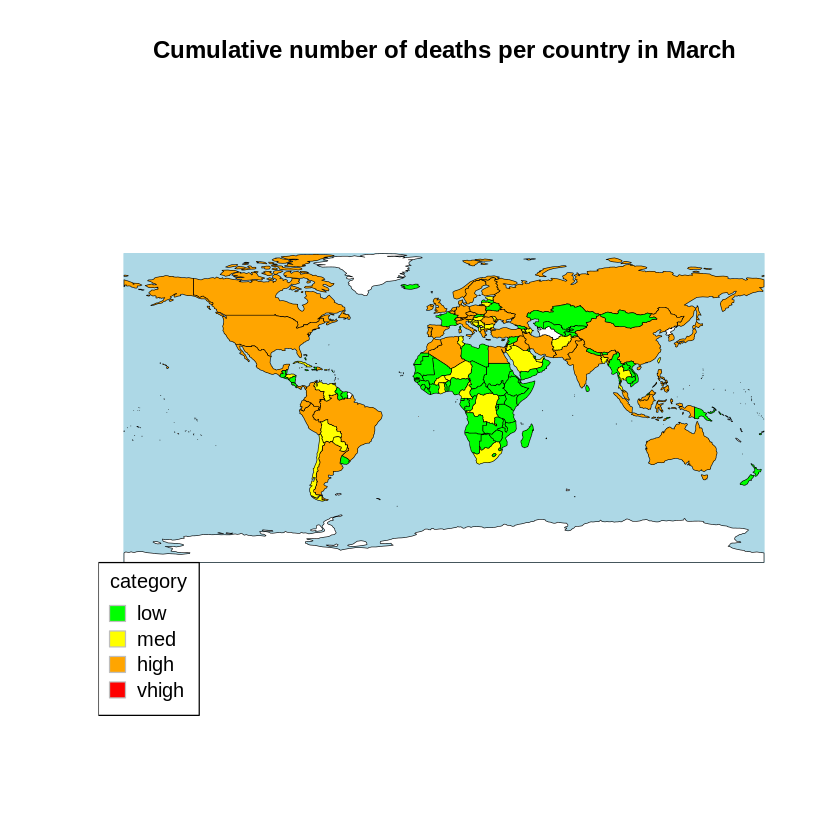

In [ ]:
#categorical method


#creating a user defined colour palette

op <- palette(c('green','yellow','orange','red'))

#find quartile breaks
cutVector <- quantile(gtdMap[["deaths"]],na.rm=TRUE)

cutVector <- cutVector[-1]#making breaks unique

#classify the data to a factor
gtdMap[["deaths"]] <- cut(gtdMap[["deaths"]], cutVector, include.lowest=TRUE)

#rename the categories
levels(gtdMap[["deaths"]]) <- c('low', 'med', 'high', 'vhigh')

#mapping
mapCountryData(gtdMap, nameColumnToPlot="deaths"
                     , catMethod='categorical'
                     , mapTitle='Cumulative number of deaths per country in March'
                     , colourPalette='palette'
                     , oceanCol='lightblue'
                     , missingCountryCol='white',borderCol = "black")


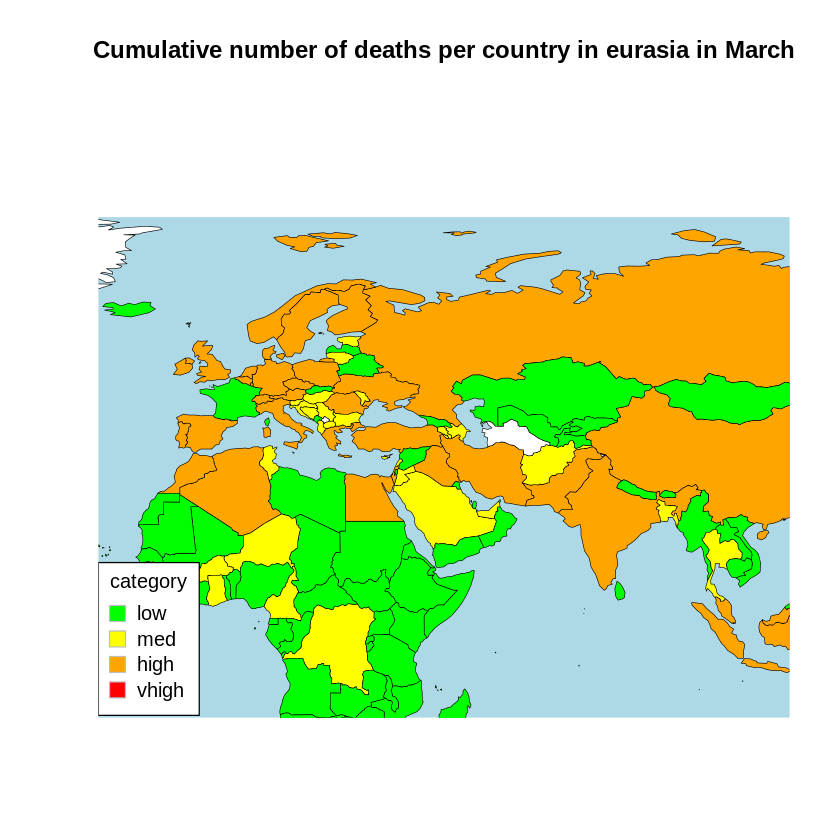

In [ ]:
#zooming in


mapCountryData(gtdMap, nameColumnToPlot="deaths"
               , catMethod='categorical'
               , mapTitle='Cumulative number of deaths per country in eurasia in March'
               , colourPalette='palette'
               , oceanCol='lightblue'
               , missingCountryCol='white',mapRegion='Eurasia',borderCol = "black")


 Como segundo método de realização de mapas foram utilizados os pacotes **ggplot** e **maps**, os mapas do ggplot a seguir foram feitos utilizando o número de casos acumulados na data atual do envio deste relatório. Ao combinar o pacote **ggtemes** com a visualização do **ggplot**, os mapas realizados podem ser configurados para ter a visualização similar a do *tableau*, o único ponto negativo é ter que renomear os países para então poder juntar o mapa *sf* provido pelo pacote **maps**, porém os resultados são bastantes satisfatórios.

No momento desse relatório os países com maior número de casos confirmados são os EUA, Brasil e India.

In [ ]:
library(maps)
world <- map_data('world')
data <- covid19(start ='2020-08-20',end='2020-08-20')

countries<-aggregate(confirmed~administrative_area_level_1,data,sum)
head(countries)




,administrative_area_level_1,confirmed
,<chr>,<int>
1,Afghanistan,37599
2,Albania,7812
3,Algeria,39847
4,American Samoa,0
5,Andorra,1024
6,Angola,2015


In [ ]:
#renaming countries
countries$administrative_area_level_1 <- gsub("United Kingdom", "UK", countries$administrative_area_level_1)
countries$administrative_area_level_1 <- gsub("United States", "USA", countries$administrative_area_level_1)
countries$administrative_area_level_1 <- gsub("Congo", "Republic of Congo", countries$administrative_area_level_1)
countries$administrative_area_level_1 <- gsub("Republic of Congo, the Democratic Republic of the", "Democratic Republic of the Congo", countries$administrative_area_level_1)
countries$administrative_area_level_1 <- gsub("Cote d'Ivoire", "Ivory Coast", countries$administrative_area_level_1)
countries$administrative_area_level_1 <- gsub("Korea, South", "South Korea", countries$administrative_area_level_1)

names(countries)[names(countries) == "administrative_area_level_1"] <- "region"

total<-merge(world,countries,by="region")
total$region<-factor(total$region)
total <- total[order(total$order),] # order the data [very important!]

In [ ]:
install.packages("ggthemes")
library(ggthemes)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



*NOTA*: Esse seria o código utilizado para construir, porém o mesmo não está rodando no google colab, deve ser algum problema na otmização do pacote **ggthemes**, para esta plataforma, porém segue o código e o gráfico realizado para o dia 20/08/2020

ggplot(total, aes(long, lat, group=group, fill=confirmed)) +
  geom_polygon(color="grey")+theme_map()+scale_fill_continuous_tableau()


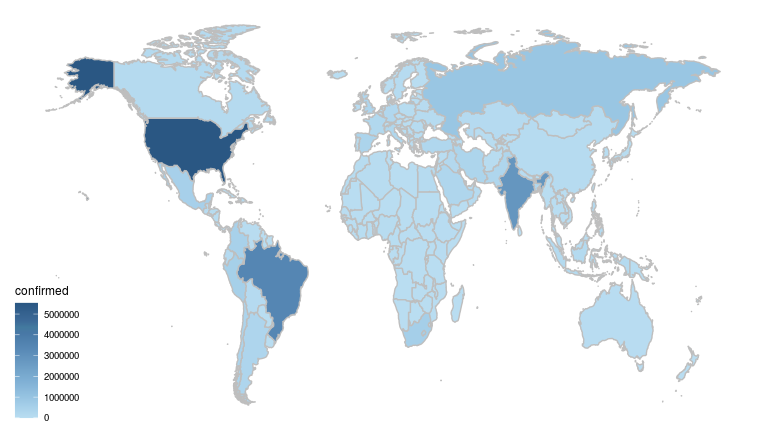

Mais coisas avançadas podem ser realizadas ao combinar diferentes pacotes como o **sf** e o **rnaturalearth** para obter um objeto de classe sf com o **ggplot** e ao utilizar a função *geom_sf()*, ao invés da *geom_polygon()*. O google colab não possui as dependências necessárias para rodar o pacote **sf**, portanto segue o gráfico realizado para 20/08/2020


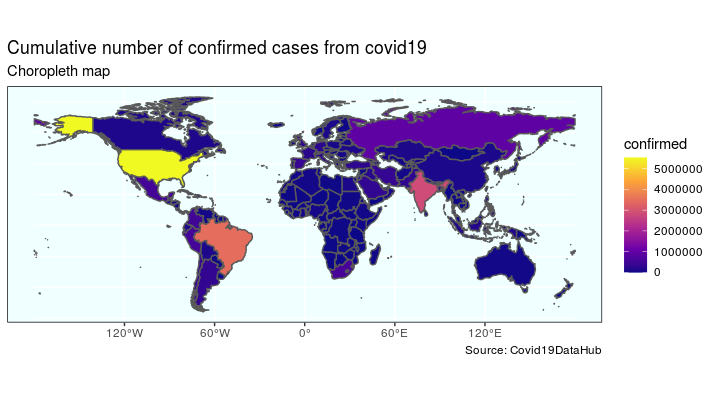

Fica muito mais claro o número acumulado de casos confirmado no momento deste relatório, é possível perceber muito mais claramente a posição dos três primeiros países com maior número de casos confirmados.

A seguir foi utilizado o pacote plotly para construir gráficos interativos, e que provavelmente é até mais fácil que o primeiro método aqui utilizado, o plotly se mostra eficiente por parecer com o ggplot porém não omitir os países que não possuem dados do gráfico. A exemplo do Turcomenistão e da Groelândia que foram omitidos dos mapas realizados no ggplot

In [ ]:
#Probably the easiest way to do it

#useful to read later: https://plotly.com/r/map-subplots-and-small-multiples/

install.packages("plotly")
library(plotly)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘hexbin’, ‘data.table’



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




O grafico a seguir se refere a política de isolamento social aplicada nos países no dia 16 de agosto de 2020, sendo:

0. Sem informação
1. Apenas os que mostram sintomas e possuem algum critério específico
2. Apenas os que mostram sintomas
3. Testagem livre


Infelizmente o código a seguir não pode ser rodado no google colab:

Porém é possível observar a simplicidade para se construir um mapa com esse pacote, preservando todos os países e informação geográfica.


In [ ]:
df <- covid19(start = "2020/08/16",end = "2020/08/16")

plot_ly(df, type='choropleth', locations=df$id, z=df$testing_policy, text=df$administrative_area_level_1, colorscale=~testing_policy)

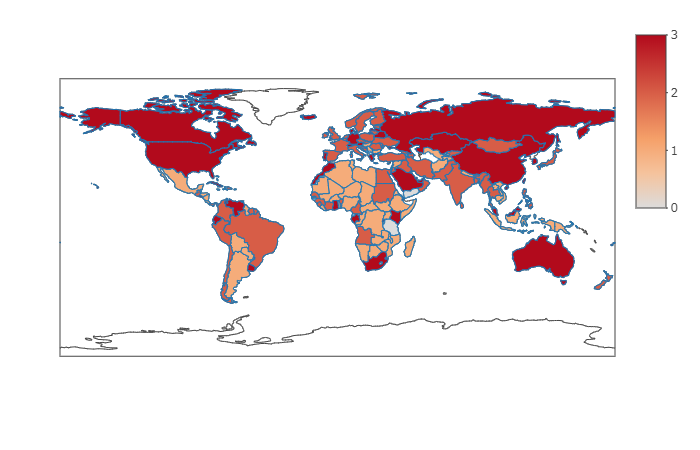

Para verificar a interatividade dos mapas foi publicado um mapa referente a testagem acumulada no site: https://rpubs.com/marrea/cumulative

Dentre os países que mais testam temos, os EUA, Rússia e a India

Provavelmente o melhor pacote para realização de mapas, contendo integração com mapas do leaflet, foi o **tmap**, nele é possível escolher a projeção do mapa escolher interatividade para os mesmos, etc. O problema porém é que é necessário utilizar o pacote **sf** que não roda no google colab, logo segue alguns mapas realizados. Vale ressaltar que também é possível fazer mapas interativos no tmap


O gráfico se refere ao número de casos confirmados no final de fevereiro, é possível ver que a China neste momento era o epicentro da pandemia de Covid19.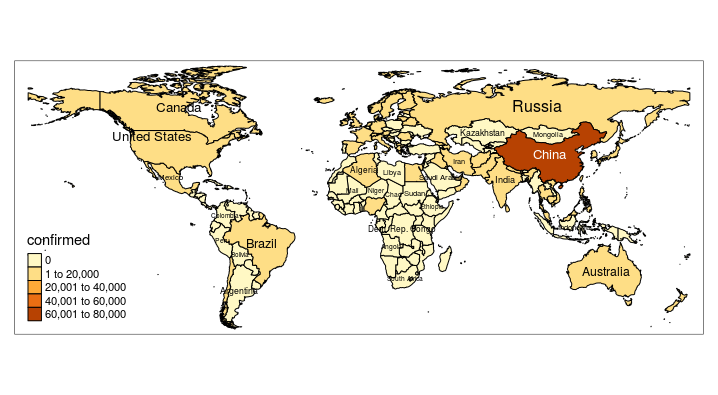

No gráfico do tmap é possivel utilizar a latitude e longitude para plotar o nome dos países no mapa de acordo com sua área, enquanto no ggplot o mapa ficaria cheio de nomes e impossibilitaria a visualização do comportamento do número de casos

é melhor também para plotar gráficos de acordo com o tempo, sendo que posso utilizar apenas um grid para colocar dois mapas em comparação, no mapa a seguir por exemplo é possivel comparar os números de casos de fevereiro para março.


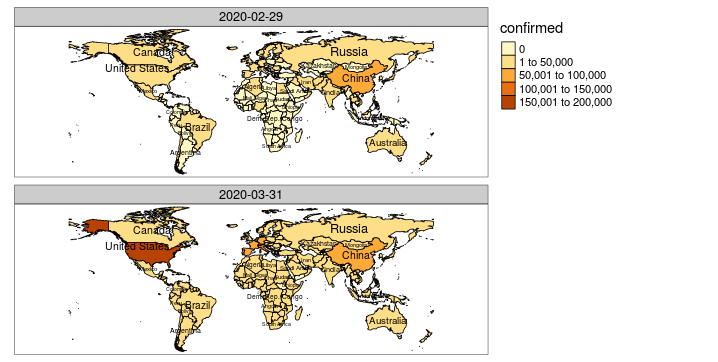

É possível ver que no final de março os EUA já passaram a ser o epicentro da pandemia nas Américas e a Itália na Europa

In [ ]:
library(ggthemes)
install.packages("gridExtra")
library(gridExtra)



Para a realização de séries temporais podem ser utilizados o ggplot e o plotly, sendo o segundo para criar os gráficos interativos.

No gráfico a seguir foram utilizados os dados atualizados da covid19 no Brasil para analizar a curva de casos acumulados, em que é possível observar algo muito similar a uma exponencial.

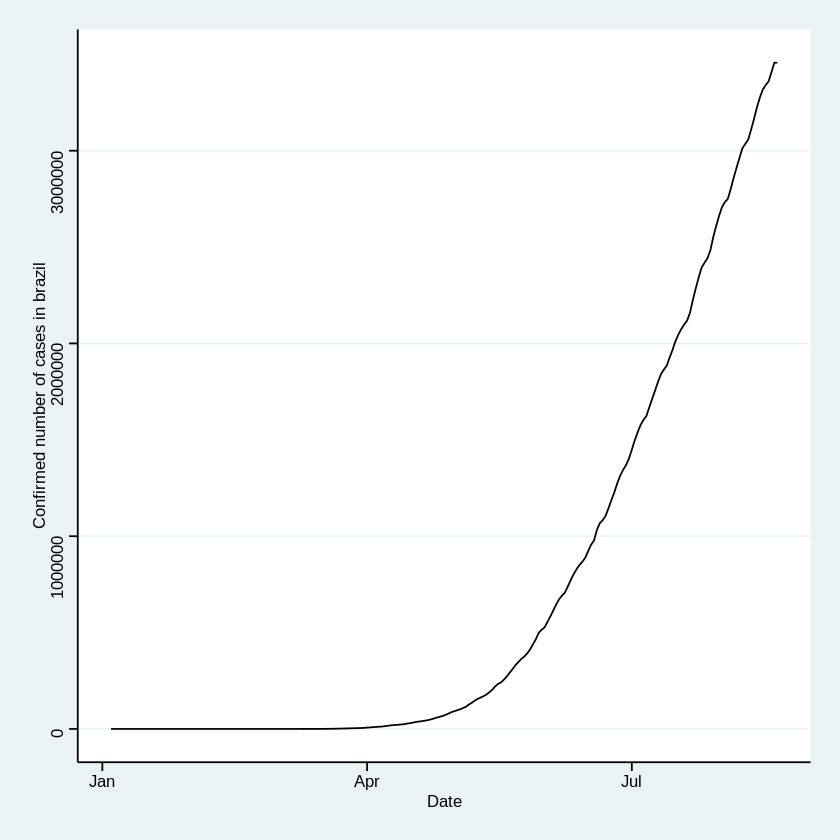

In [ ]:
data <- covid19()#updated data
databr <- data %>% filter(administrative_area_level_1=="Brazil") 

options(scipen = 999)

p <- ggplot(databr, aes(x=date, y=confirmed)) +
  geom_line() + 
  xlab("Date")+ylab("Confirmed number of cases in brazil")+theme_stata()
p#updated number of cases plot

Também é possível utilizar o plot básico do R para plotar a série

Warning message in plot.xy(xy, type, ...):
“plot type 'line' will be truncated to first character”


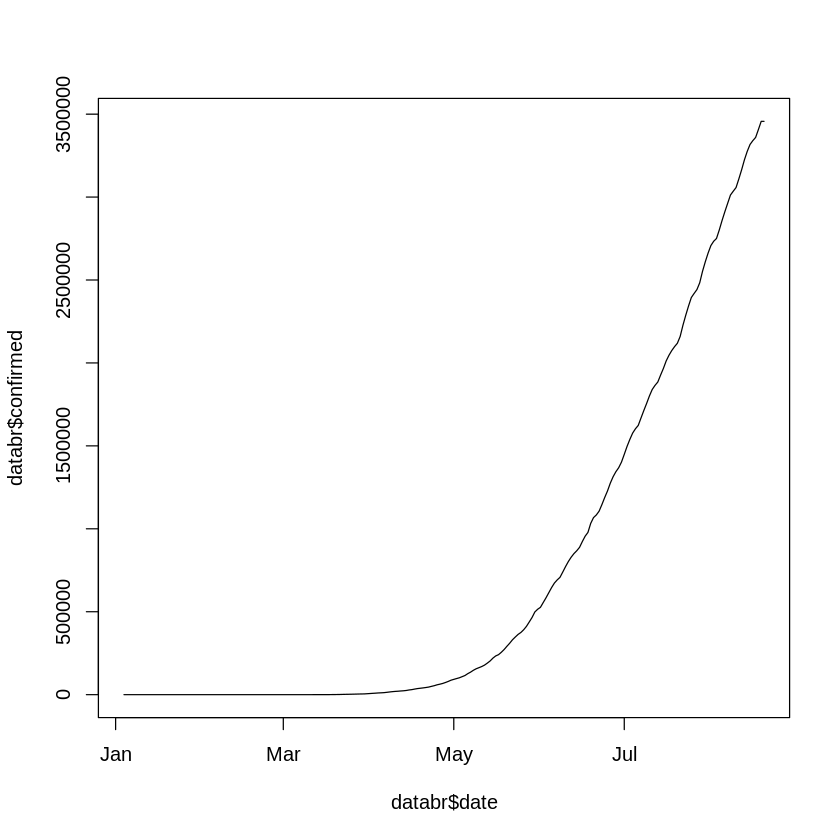

In [ ]:
#standard plot
plot(databr$date,databr$confirmed,type = "line")


Para comparar a curva de casos acumulados no Brasil e no mundo é possivel plotar as duas séries temporais no emsmo grid com o pacote gridExtra, é possível ver que a curva de casos acumulados no mundo em certo tempo deu um leve estabilizada em certo periodo (ou cresceu muito pouco), não seguindo uma exponencial muito similar a do Brasil.

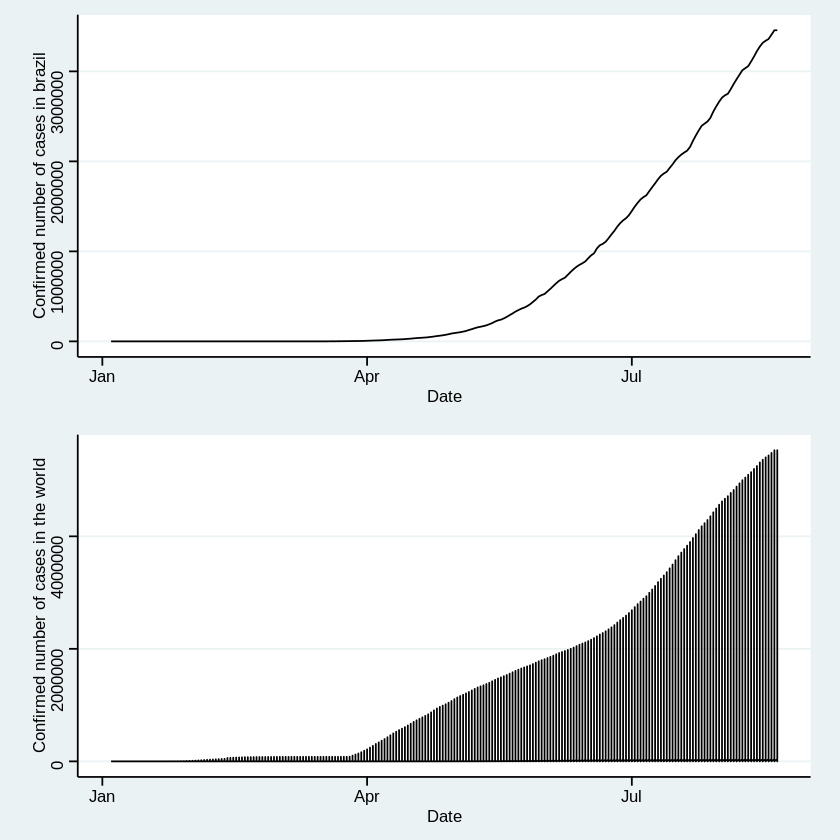

In [ ]:
#two plots in the same grid
q <- ggplot(data, aes(x=date, y=confirmed)) +
  geom_line() + 
  xlab("Date")+ylab("Confirmed number of cases in the world")+theme_stata()
grid.arrange(p, q, ncol=1)



Com o plotly foi feito um gráfico interativo do número acumulado de casos no brasil: https://rpubs.com/marrea/timeseriesbr_confirmed , o mesmo pode ser analizado neste endereço.

In [ ]:

#install.packages("plotly")
library(plotly)

fig <- plot_ly(x = databr$date, y = databr$confirmed, mode = 'lines', text = paste(databr$confirmed))

fig


*Correção: a outra base de dados encontrada também apresenta apenas o número acumulado de casos